In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.tsa
from pandas import datetime
import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'


In [3]:
def parser(x):
    return datetime.strptime(x, '%Y-%m-%d')

GDP = pd.read_csv('GDP.csv', parse_dates=[0], date_parser = parser, index_col = 0)
GDP.head()

,GDP Change
observation_date,
1963-01-01,5.5
1964-01-01,7.4
1965-01-01,8.4
1966-01-01,9.6
1967-01-01,5.7


### time series plot to determine stationarity

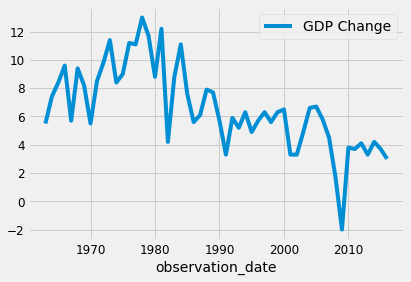

In [4]:
GDP.plot()

###### the data is not stationary confirmation from the autocorrelation plots shows below

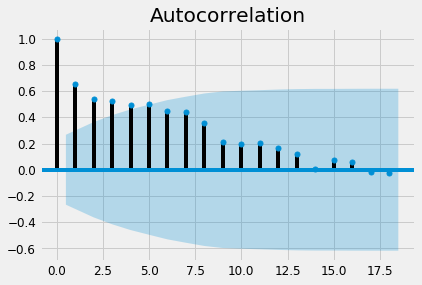

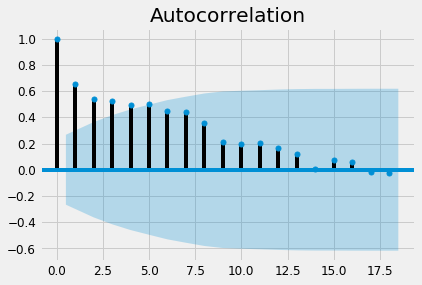

In [5]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(GDP)

In [6]:
GDP_diff = GDP.diff(periods=1) 
GDP_diff3 = GDP.diff(periods=3)
GDP_diff7 = GDP.diff(periods=7)

In [7]:
GDP_diff = GDP_diff[1:]
GDP_diff.head(10)

,GDP Change
observation_date,
1964-01-01,1.9
1965-01-01,1.0
1966-01-01,1.2
1967-01-01,-3.9
1968-01-01,3.7
1969-01-01,-1.2
1970-01-01,-2.7
1971-01-01,3.0
1972-01-01,1.3


In [8]:
GDP_diff3.head(20)

,GDP Change
observation_date,
1963-01-01,NaN
1964-01-01,NaN
1965-01-01,NaN
1966-01-01,4.1
1967-01-01,-1.7
1968-01-01,1.0
1969-01-01,-1.4
1970-01-01,-0.2
1971-01-01,-0.9


In [9]:
GDP_diff3 = GDP_diff3[3:]
GDP_diff3.head()

,GDP Change
observation_date,
1966-01-01,4.1
1967-01-01,-1.7
1968-01-01,1.0
1969-01-01,-1.4
1970-01-01,-0.2


In [10]:
GDP_diff3.shape

(51, 1)

In [11]:
GDP_diff7.head(10)

,GDP Change
observation_date,
1963-01-01,NaN
1964-01-01,NaN
1965-01-01,NaN
1966-01-01,NaN
1967-01-01,NaN
1968-01-01,NaN
1969-01-01,NaN
1970-01-01,0.0
1971-01-01,1.1


In [12]:
GDP_diff7 = GDP_diff7[7:]
GDP_diff7.head()

,GDP Change
observation_date,
1970-01-01,0.0
1971-01-01,1.1
1972-01-01,1.4
1973-01-01,1.8
1974-01-01,2.7


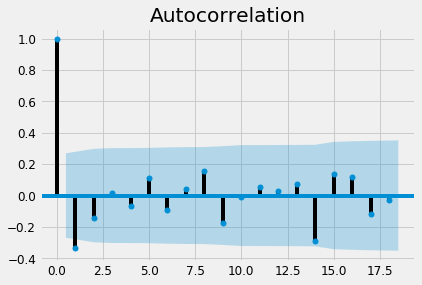

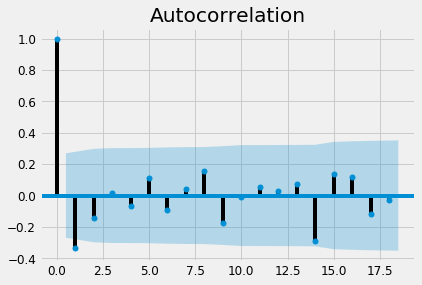

In [13]:
plot_acf(GDP_diff)

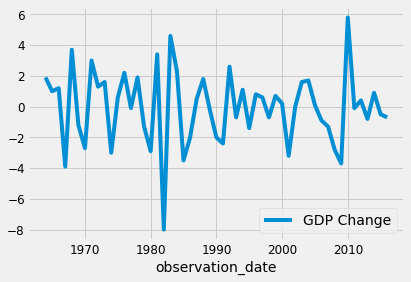

In [14]:
GDP_diff.plot()

In [15]:
X = GDP.values
X.size

54

In [80]:
test_arima = GDP.values

In [16]:
train = X[0:39]
test = X[39:]
predictions = []

In [17]:
X3 = GDP_diff3.values
train3 = X3[0:35]
test3 = X3[35:]

In [18]:
X3.size

51

In [19]:
train3.size

35

In [20]:
test3.size

16

In [21]:
X7 = GDP_diff7.values
train7 = X7[0:31]
test7 = X7[31:]

In [22]:
X7.size

47

In [23]:
train7.size

31

In [24]:
test7.size

16

In [25]:
train.size

39

In [26]:
test.size

15

### conducting simple auto-regressive for 3 and 7 term one step forecast

In [27]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

In [28]:
model_ar = AR(train)
model_ar_fit = model_ar.fit()


#### simple Autoregressive of 3 term moving avarage

In [29]:
model_ar3 = AR(train3)
model_ar3_fit = model_ar3.fit()
predictions3 = model_ar_fit.predict(start=36, end=51)

#### imple Autoregressive of 7 term moving avarage


In [30]:
model_ar7 = AR(train7)
model_ar7_fit = model_ar7.fit()
predictions7 = model_ar_fit.predict(start=32, end=47)

#### plots of forcasted one step moving average from 2001 to the end of the series

#### orange is 3 term MA
#### red is 7 term MA

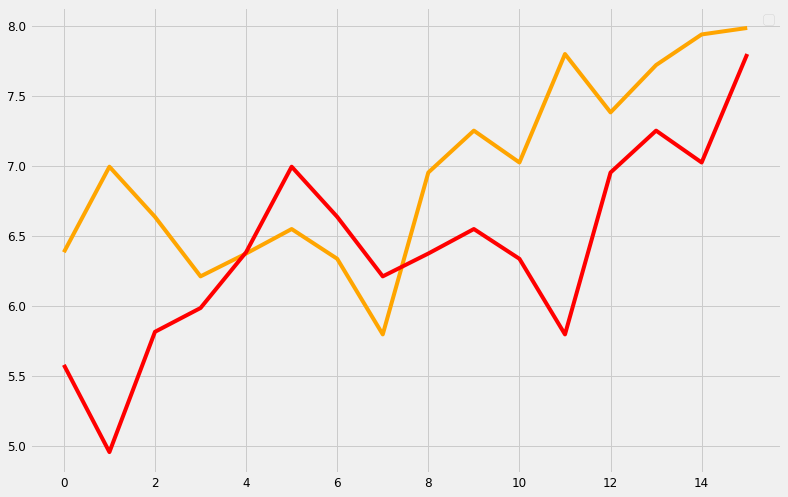

In [31]:
plt.figure(figsize = (12, 8))
plt.plot(predictions3, color = 'orange')
plt.plot(predictions7, color = 'red')

plt.legend(predictions3, predictions7)
import warnings
warnings.filterwarnings('ignore')

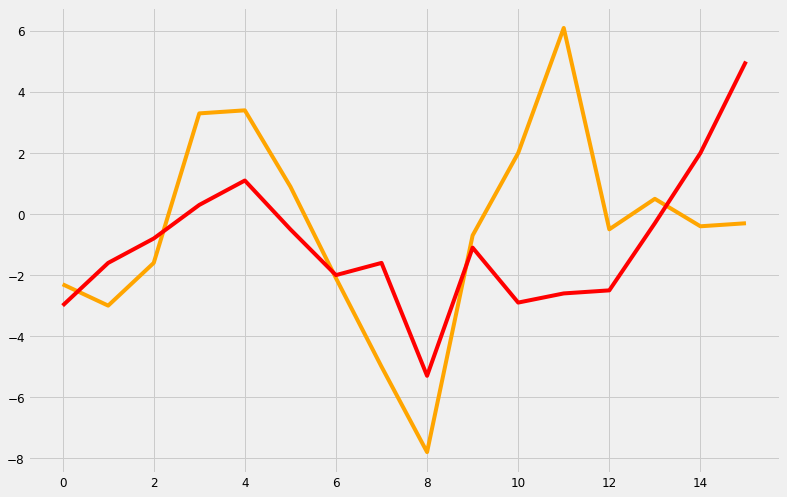

In [32]:
plt.figure(figsize = (12, 8))
plt.plot(test3, color = 'orange')
plt.plot(test7, color = 'red')




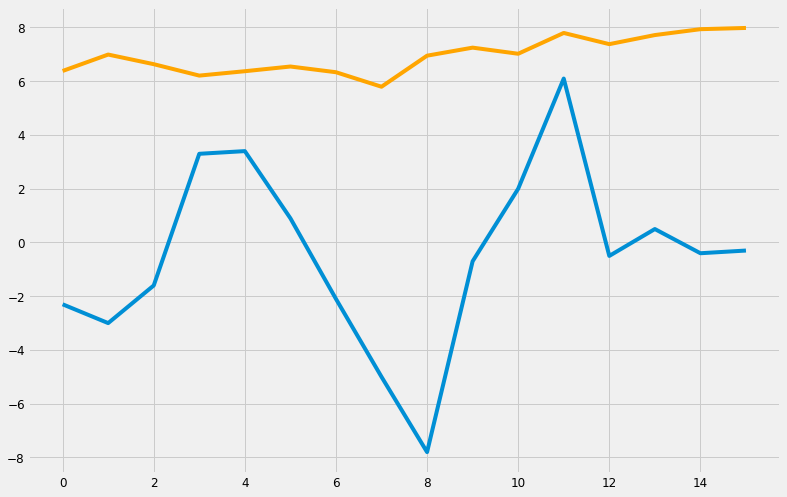

In [33]:
plt.figure(figsize = (12, 8))
plt.plot(predictions3, color = 'orange')
plt.plot(test3)


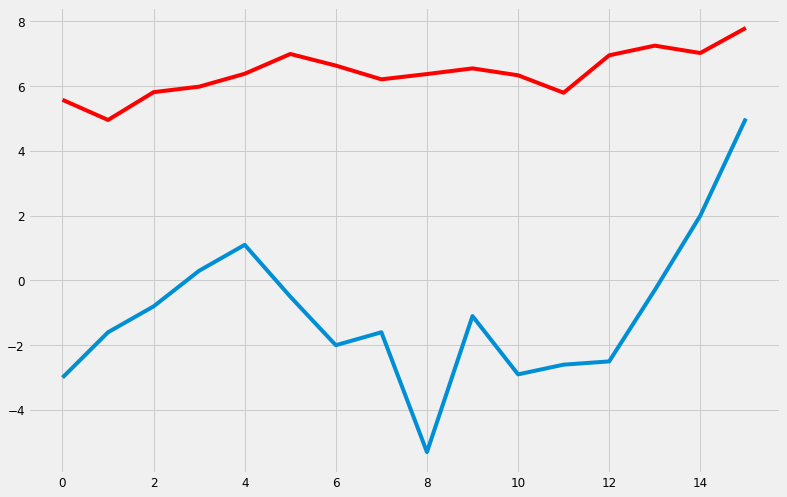

In [34]:
plt.figure(figsize = (12, 8))
plt.plot(test7)
plt.plot(predictions7, color = 'red')


In [35]:
predictions = model_ar_fit.predict(start=38, end=54)

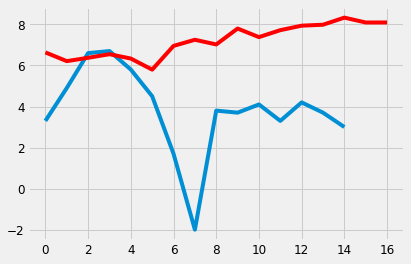

In [36]:
plt.plot(test)
plt.plot(predictions, color = 'red')

In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error 
from math import sqrt

In [38]:
test3

array([[-2.3],
       [-3. ],
       [-1.6],
       [ 3.3],
       [ 3.4],
       [ 0.9],
       [-2.1],
       [-5. ],
       [-7.8],
       [-0.7],
       [ 2. ],
       [ 6.1],
       [-0.5],
       [ 0.5],
       [-0.4],
       [-0.3]])

In [39]:
predictions3

array([6.38230718, 6.99288249, 6.63497936, 6.21011588, 6.37303763,
       6.54797995, 6.33552552, 5.79586903, 6.95136614, 7.25031917,
       7.0228472 , 7.7969899 , 7.38053049, 7.71838323, 7.93688016,
       7.98322354])

### RMSE of 3 term MA

In [40]:
mse = mean_squared_error(test3, predictions3)
RMSE = print(sqrt(mse))

8.066960603144862


### RMSE OF 7 term MA

In [41]:
mse7 = mean_squared_error(test7, predictions7)
RMSE_7 = print(sqrt(mse7))

7.6736416220907575


### MAE of 3 term MA

In [42]:
mae = mean_absolute_error(test3, predictions3)
MAE = print(sqrt(mae))

2.7250371197702


### MAE of 7 term MA

In [43]:
mae7 = mean_absolute_error(test7, predictions7)
MAE_7 = print(sqrt(mae7))

2.7206025524172532


## ARIMA MODEL

In [44]:
from statsmodels.tsa.arima_model import ARIMA

In [78]:
model_arima = ARIMA(X, order=(1, 1, 0))
model_arima_fit = model_arima.fit()

In [87]:
predictions1 = model_arima_fit.forecast(steps=15)[0]

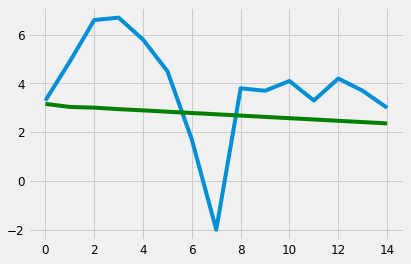

In [89]:
plt.plot(test)
plt.plot(predictions1, color = 'green')

### RMSE of arima model

In [90]:
Arima_RMSE = sqrt(mean_squared_error(test, predictions1))
print(Arima_RMSE)

2.246273079119745


### MAE of arima model

In [92]:
Arima_MAE = mean_absolute_error(test, predictions1)
print(Arima_MAE)

1.8592727093553194


### AIC of the arima model

In [93]:
print(model_arima_fit.aic)

242.88832164679343


In [94]:
import itertools


In [95]:
p=d=q = range(0, 5)
pdq = list(itertools.product(p, d, q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [96]:
for param in pdq:
    model_arima = ARIMA(train, order=(param))
    model_arima_fit = model_arima.fit()
    print(param, model_arima_fit.aic)

(0, 0, 0) 185.3889145471774
(0, 0, 1) 180.65568608867437
(0, 0, 2) 181.41826385812
(0, 0, 3) 181.13815649043642
(0, 0, 4) 182.1205276474476
(0, 1, 0) 181.70913730016
(0, 1, 1) 170.18474569760644
(0, 1, 2) 172.14081368431954


ValueError: The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.

In [97]:
print(model_arima_fit.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0569      0.122     -0.465      0.644      -0.297       0.183
ma.L1.D.y     -0.7003      0.210     -3.337      0.002      -1.111      -0.289
ma.L2.D.y      0.0441      0.212      0.208      0.836      -0.371       0.459


In [55]:
mod = sm.tsa.statespace.SARIMAX(GDP,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2798      0.309      0.904      0.366      -0.327       0.886
ma.L1         -1.0000   3438.710     -0.000      1.000   -6740.747    6738.747
ar.S.L12      -0.4841      0.143     -3.393      0.001      -0.764      -0.204
sigma2         5.2038   1.79e+04      0.000      1.000   -3.51e+04    3.51e+04


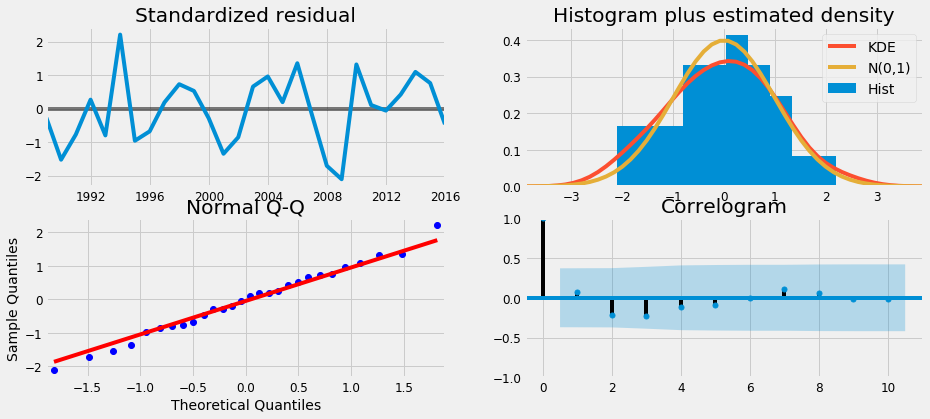

In [56]:
results.plot_diagnostics(figsize=(14, 6))
plt.show()

In [57]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing

Text(0, 0.5, 'GDP change')

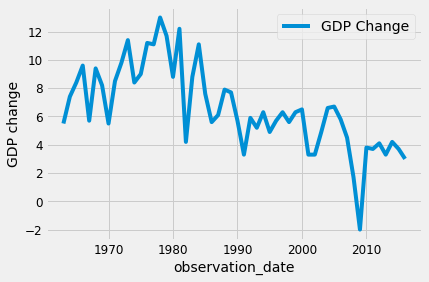

In [58]:
ax =GDP.plot()
ax.set_label('Year')
ax.set_ylabel('GDP change')

In [59]:
GDP_SES_train = GDP[0:37]
GDP_SES_test = GDP[37:52]

In [60]:
fit1 = SimpleExpSmoothing(GDP_SES_train).fit(smoothing_level=0.2, optimized=False)
fcast1 = fit1.forecast(15). rename(r'$\alpha=0.2')

fit2 = SimpleExpSmoothing(GDP_SES_train).fit(smoothing_level=0.5, optimized=False)
fcast2 = fit2.forecast(15).rename(r'$\alpha=0.5')

fit3 = SimpleExpSmoothing(GDP_SES_train).fit(smoothing_level=0.8, optimized=False)
fcast3 = fit3.forecast(15).rename(r'$\alpha=0.8')

### RMSE of alpha values 0.2, 0.5, 0.8

In [61]:
SES02_alpha= sqrt(mean_squared_error(GDP_SES_test, fcast1))
SES05_alpha = sqrt(mean_squared_error(GDP_SES_test, fcast2))
SES08_alpha = sqrt(mean_squared_error(GDP_SES_test, fcast3))

print(SES02_alpha)
print(SES05_alpha)
print(SES08_alpha)

2.893976242466971
2.916930732894537
3.0246845085094334


### MAE of alpha values 0.2, 0.5, 0.8

In [62]:
SES02_alpha= mean_absolute_error(GDP_SES_test, fcast1)
SES05_alpha = mean_absolute_error(GDP_SES_test, fcast2)
SES08_alpha = mean_absolute_error(GDP_SES_test, fcast3)

print(SES02_alpha)
print(SES05_alpha)
print(SES08_alpha)

2.2101514637440958
2.2303123357233323
2.322714133935423


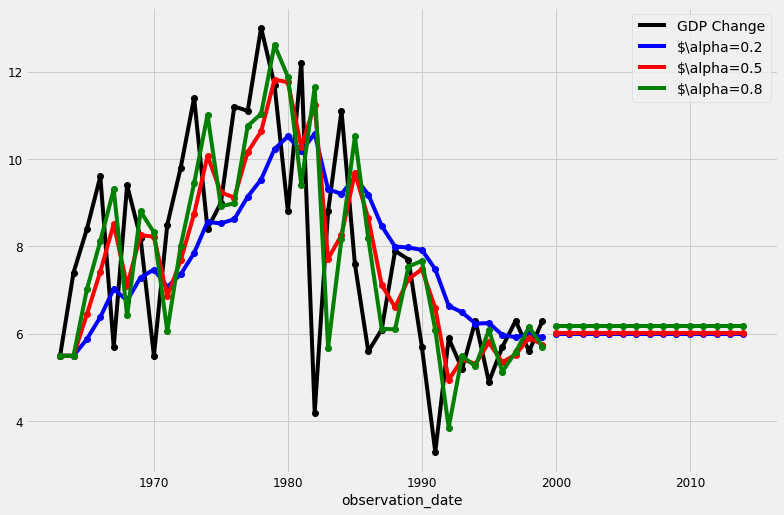

In [63]:
ax = GDP_SES_train.plot(marker='o', color='black', figsize=(12,8))
fcast1.plot(marker='o', ax=ax, color='blue', legend=True)
fit1.fittedvalues.plot(marker='o', ax=ax, color='blue')
fcast2.plot(marker='o', ax=ax, color='red', legend=True)

fit2.fittedvalues.plot(marker='o', ax=ax, color='red')
fcast3.plot(marker='o', ax=ax, color='green', legend=True)
fit3.fittedvalues.plot(marker='o', ax=ax, color='green')
plt.show()